In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def print_demo(data, label):
    print(f"\n{label}")
    print("-" * 50)
    print(data)

#  $X$
- Raw features

|$x_1$|$x_2$|$x_3$|$x_4$|
|-|-|-|-|
|1|2|1|2|
|5|1|3|1|
|4|5|2|1|
|2|2|4|1|
|2|5|3|4|
|5|0|0|1|

In [2]:
X = np.array([[1, 2, 1, 2], [5, 1, 3, 1], [4, 5, 2, 1], [2, 2, 4, 1], [2, 5, 3, 4], [5, 0, 0, 1]])
# features_original = np.random.rand(100,10)

mu = X.mean(axis=0)
features = (X - mu)

# Calculation of $X_{cov}$

In [3]:
features_cov = np.cov(features.T)
print_demo(np.diag(features_cov), "X | Covariance | Diagonal")
print_demo(np.diag(features_cov).sum(), "X | Covariance | Diagonal | Sum")


X | Covariance | Diagonal
--------------------------------------------------
[2.96666667 4.3        2.16666667 1.46666667]

X | Covariance | Diagonal | Sum
--------------------------------------------------
10.9


# Eigen decomposition of the $X_{cov}$
- $X_{cov}.\nu$ = $\lambda.\nu$
- Where
    - $\lambda$ is a diagonal matrix of elements $[\lambda_1, \lambda_2, \lambda_3, \lambda_4]$
    - $\nu$ is the matrix of Eigen Column Vectors $[\nu_1, \nu_2, \nu_3, \nu_4]$
- Multiply both sides with $\nu^{-1}$
    - $X_{cov}.\nu.\nu^{-1}$ = $\lambda.\nu.\nu^{-1}$
- $X_{cov}$ = $\nu.\lambda.\nu^{-1}$

In [4]:
eigen_values, eigen_vectors = np.linalg.eigh(features_cov)
eigen_vectors_inv = np.linalg.inv(eigen_vectors)

print_demo(eigen_values, "X | Eigen Values")
print_demo(eigen_values.sum(), "X | Eigen Values | Sum")


X | Eigen Values
--------------------------------------------------
[0.66037412 1.78764704 2.22345965 6.22851919]

X | Eigen Values | Sum
--------------------------------------------------
10.900000000000002


In [5]:
features_cov_recon = eigen_vectors.dot(np.diag(eigen_values)).dot(eigen_vectors_inv)

In [6]:
# print_demo(features_original, "X | Original")
# print_demo(mu, "X | Statistics | Means")
# print_demo(sigma, "X | Statistics | Sigma")
# print_demo(features, "X")
# print_demo(features, "X | Transpose")
# print_demo(features_cov, "X | Covariance ")
# print_demo(eigen_vectors, "Eigen | Vectors")
# print_demo(eigen_vectors_inv, "Eigen | Vectors | Inverse")
# print_demo(eigen_values, "Eigen | Values")
# print_demo(features_cov_recon, "X | Reconstructred")

np.diag(features_cov)

array([2.96666667, 4.3       , 2.16666667, 1.46666667])

In [7]:
idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]


total_variance = np.sum(eigen_values)
explained_variance_ratio = eigen_values / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

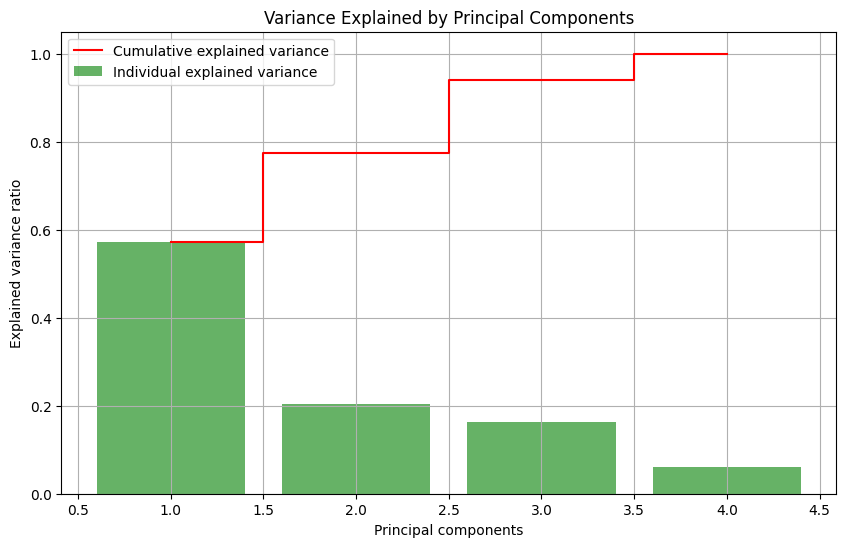

Using 1 components, reconstruction error: 2.9284
Using 2 components, reconstruction error: 1.9057
Using 3 components, reconstruction error: 0.6604
Using 4 components, reconstruction error: 0.0000


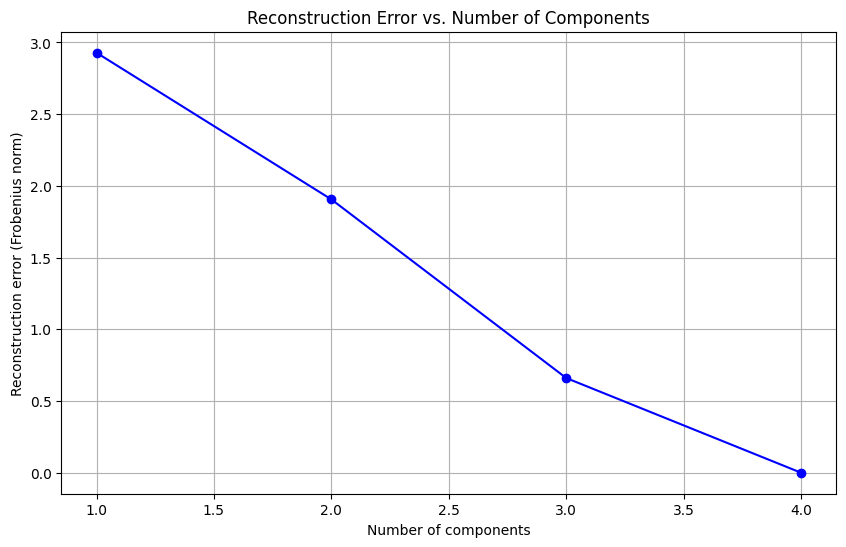


Cumulative Variance Explained:
Components 1: 57.14%
Components 2: 77.54%
Components 3: 93.94%
Components 4: 100.00%


In [8]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigen_values)+1), explained_variance_ratio, alpha=0.6,
        color='g', label='Individual explained variance')
plt.step(range(1, len(eigen_values)+1), cumulative_variance, where='mid',
         label='Cumulative explained variance', color='r')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Variance Explained by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Reconstruct covariance matrix with different numbers of components
reconstruction_errors = []
for n_components in range(1, len(eigen_values)+1):
    # Select top n components
    components = eigen_vectors[:, :n_components]
    eigenvalues_diag = np.diag(eigen_values[:n_components])

    # Reconstruct covariance matrix
    reconstructed_cov = components @ eigenvalues_diag @ components.T

    # Calculate reconstruction error
    error = np.linalg.norm(features_cov - reconstructed_cov, 'fro')
    reconstruction_errors.append(error)

    print(f"Using {n_components} components, reconstruction error: {error:.4f}")

# Plot reconstruction error
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigen_values)+1), reconstruction_errors, 'b-o')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error (Frobenius norm)')
plt.title('Reconstruction Error vs. Number of Components')
plt.grid(True)
plt.show()

# Display the cumulative variance explained
print("\nCumulative Variance Explained:")
for i, variance in enumerate(cumulative_variance):
    print(f"Components {i+1}: {variance*100:.2f}%")

In [9]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Set random seed for reproducibility
# np.random.seed(42)

# # Generate sample data
# features_original = np.random.rand(100, 10)
# mu = features_original.mean(axis=0)
# features = features_original - mu

# # Calculate covariance matrix
# features_cov = np.cov(features.T)  # Note: np.cov expects variables in rows, observations in columns

# # Eigen decomposition
# eigen_values, eigen_vectors = np.linalg.eigh(features_cov)

# # Sort eigenvalues and eigenvectors in descending order
# idx = np.argsort(eigen_values)[::-1]
# eigen_values = eigen_values[idx]
# eigen_vectors = eigen_vectors[:, idx]

# # Calculate explained variance
# total_variance = np.sum(eigen_values)
# explained_variance_ratio = eigen_values / total_variance
# cumulative_variance = np.cumsum(explained_variance_ratio)

# # Plot explained variance
# plt.figure(figsize=(10, 6))
# plt.bar(range(1, len(eigen_values)+1), explained_variance_ratio, alpha=0.6,
#         color='g', label='Individual explained variance')
# plt.step(range(1, len(eigen_values)+1), cumulative_variance, where='mid',
#          label='Cumulative explained variance', color='r')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal components')
# plt.title('Variance Explained by Principal Components')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()

# # Reconstruct covariance matrix with different numbers of components
# reconstruction_errors = []
# for n_components in range(1, len(eigen_values)+1):
#     # Select top n components
#     components = eigen_vectors[:, :n_components]
#     eigenvalues_diag = np.diag(eigen_values[:n_components])

#     # Reconstruct covariance matrix
#     reconstructed_cov = components @ eigenvalues_diag @ components.T

#     # Calculate reconstruction error
#     error = np.linalg.norm(features_cov - reconstructed_cov, 'fro')
#     reconstruction_errors.append(error)

#     print(f"Using {n_components} components, reconstruction error: {error:.4f}")

# # Plot reconstruction error
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(eigen_values)+1), reconstruction_errors, 'b-o')
# plt.xlabel('Number of components')
# plt.ylabel('Reconstruction error (Frobenius norm)')
# plt.title('Reconstruction Error vs. Number of Components')
# plt.grid(True)
# plt.show()

# # Display the cumulative variance explained
# print("\nCumulative Variance Explained:")
# for i, variance in enumerate(cumulative_variance):
#     print(f"Components {i+1}: {variance*100:.2f}%")

In [15]:
components = eigen_vectors[:, :2]
eigenvalues_diag = np.diag(eigen_values[:2])

# Reconstruct covariance matrix
reconstructed_cov = components @ eigenvalues_diag @ components.T

# Calculate reconstruction error
error = np.linalg.norm(features_cov - reconstructed_cov, 'fro')
error


np.float64(1.9057218899099229)